In [1]:
%matplotlib inline
import mpld3
#mpld3.enable_notebook()

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')

from transitfit.utils import t_folded, lc_eval
from transitfit import KeplerLightCurve, TransitModel

In [2]:
lc = KeplerLightCurve(1422, [1,2])
model = TransitModel(lc)

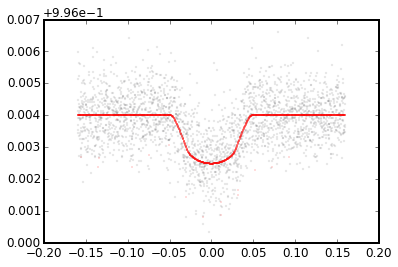

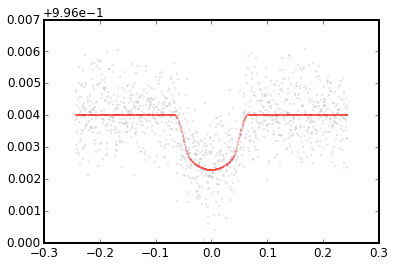

In [3]:
params = lc.archive_params
#params[3] = 0.5 #dilution
f = model.evaluate(params)

for i in range(lc.n_planets):
    plt.figure()
    tfold = lc.t_folded(i) #times folded on proper period 
    close = lc.t_close(i, width=2) #points close to transit
    plt.plot(tfold[close], lc.flux[close], 'o', ms=0.2, alpha=0.35);
    plt.plot(tfold[close], f[close], 'ro', ms=0.3, mec='r', mew=0.5);
    

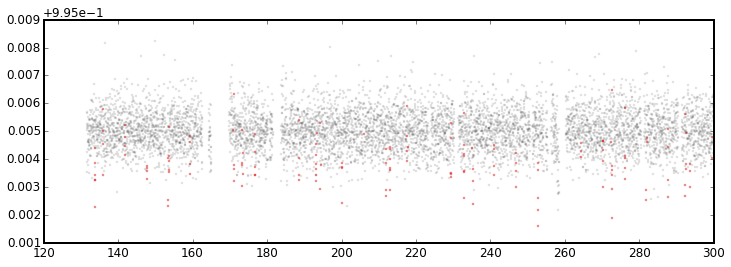

In [4]:
npts = 2000
tmax = 300
plt.figure(figsize=(12,4))
plt.plot(lc.time[lc.t < tmax], lc.flux[lc.t < tmax], 'o', ms=0.3, alpha=0.3)
mask = (lc.time < tmax) & lc.any_intransit
plt.plot(lc.time[mask], lc.flux[mask], 'ro', ms=0.3, mec='r');

In [7]:
%timeit f = model.evaluate(params)

10 loops, best of 3: 63 ms per loop


In [6]:
from scipy.optimize import minimize

fit = model.fit_leastsq(params, options={'disp':True})

Optimization terminated successfully.
         Current function value: 0.000889
         Iterations: 2
         Function evaluations: 606


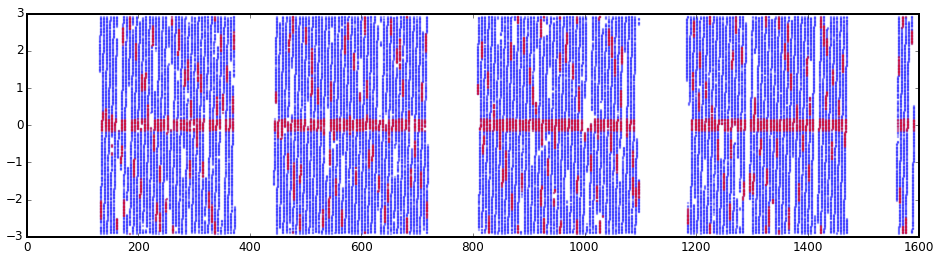

In [6]:
def transit_stack(model, i=0, width=2, i_transit=None):
    """    
    """

    tfold = model.t_folded(i)
    close = model.anyclose
    
    
    t = model.time
    
    plt.figure(figsize=(16,4))
    plt.plot(t, tfold, '.', ms=0.5)
    if i_transit is None:
        plt.plot(t[close], tfold[close], 'r.', ms=0.5)
    else:
        mask = model.transit_mask(i, i_planet, width=width)
        plt.plot(t[mask], tfold[mask])
    
transit_stack(model)
    
    

[  4.72954152e+00   2.81073558e-01   5.87961813e-01   1.91477839e-04
   5.84164158e+00   1.35923004e+02   5.74815816e-01   3.54667764e-02
   9.97333917e-03   9.56463017e-04]


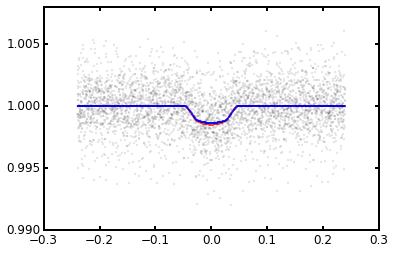

In [21]:
f_fit = np.ones_like(lcdata['TIME'])
f_fit[anyclose] = model.light_curve(fit.x, lcdata['TIME'][anyclose])

print fit.x

for period, epoch, duration in zip(periods, epochs, durations):
    plt.figure()
    tfold = (lcdata['TIME'] + period/2 - epoch) % period - (period/2)
    close = np.array(np.absolute(tfold) < 3*(duration/24))
    plt.plot(tfold[close], flux[close], 'o', ms=0.2, alpha=0.35);
    plt.plot(tfold[close], f[close], 'ro', ms=0.2, mec='r', mew=0.2);
    plt.plot(tfold[close], f_fit[close], 'bo', ms=0.2, mec='b', mew=0.4)

In [59]:
import emcee as emcee

ndim = len(params)
nwalkers = 100
p0 = (1 + np.random.normal(0,0.01,size=(ndim,nwalkers))) * np.array(params)[:,None]

sampler = emcee.EnsembleSampler(nwalkers, ndim, model.lnlike)

In [61]:
sampler.run_mcmc(p0, 10)

ValueError: low >= high

In [5]:
1 == 1 == 1

True

In [10]:
np.ones_like(4)

array(1)

In [13]:
np.array(2).size

1

In [18]:
np.ma.masked_array

numpy.ma.core.MaskedArray